In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.featureScheduler.modelObservatory import Kinem_model
from lsst.sims.utils import _hpid2RaDec
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import coordinates as coordinates
from astropy import units as u
from lsst.sims.featureScheduler.utils import approx_altaz2pa


In [23]:
km = Kinem_model()
mjd = 56320


In [15]:
_temp = km.slew_times(np.array([np.radians(0)]), np.array([np.radians(-10)]), mjd = 56320,
                      update_tracking=True, rotTelPos=np.array([0.]))
_temp

array([90.35300681])

In [16]:
km.slew_times(np.array([np.radians(0)]), np.array([np.radians(-10)]), mjd = 56320.001,
              update_tracking=True, rotTelPos=np.array([0.]))

array([2.])

In [17]:
km.slew_times(np.array([np.radians(0)]), np.array([np.radians(-60)]), mjd = 56320.001,
              update_tracking=True, rotTelPos=np.array([0.]))

array([42.52744704])

In [18]:
np.degrees(km.cumulative_azimuth_rad)

array([-145.32068077])

In [19]:
np.degrees([km.current_RA_rad, km.current_dec_rad]), km.parked

(array([[  0.],
        [-60.]]), False)

In [24]:
nside = 128
hpid = np.arange(hp.nside2npix(nside))
ra, dec = _hpid2RaDec(nside, hpid)

In [21]:
mjd = 56320.005
st = km.slew_times(ra, dec, mjd)

/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


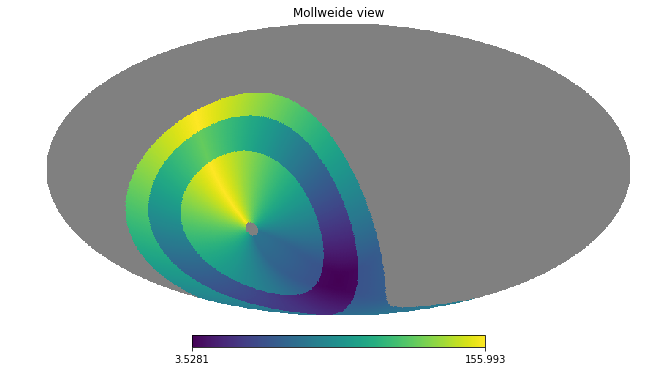

In [22]:
hp.mollview(st)

In [25]:
km.park()
np.degrees(km.cumulative_azimuth_rad)

0.0

In [26]:
st = km.slew_times(0,0,mjd, rotTelPos=np.array([0.]),
                   alt_rad=np.radians([60.]), az_rad=np.radians([90.]),
                   update_tracking=True)

In [27]:
np.degrees(km.cumulative_azimuth_rad)

array([90.])

In [28]:
st = km.slew_times(0,0,mjd, rotTelPos=np.array([0.]),
                   alt_rad=np.radians([60.]), az_rad=np.radians([91.]),
                   update_tracking=True)
np.degrees(km.cumulative_azimuth_rad)

array([91.])

In [29]:
st = km.slew_times(0,0,mjd, rotTelPos=np.array([0.]),
                   alt_rad=np.radians([60.]), az_rad=np.radians([179.]),
                   update_tracking=True)

In [30]:
np.degrees(km.cumulative_azimuth_rad)

array([179.])

In [31]:
st = km.slew_times(0,0,mjd, rotTelPos=np.array([0.]),
                   alt_rad=np.radians([60.]), az_rad=np.radians([269.]),
                   update_tracking=True)

In [32]:
np.degrees(km.cumulative_azimuth_rad)

array([269.])

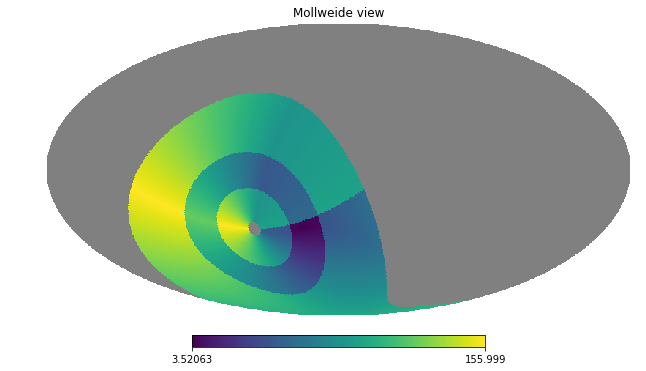

In [33]:
st = km.slew_times(ra, dec, mjd)
hp.mollview(st)

array([-85.])

array([54.57142857])